In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 数据读取与处理：

In [2]:
china = gpd.read_file("./datasets/china/china_counties.shp")
points = gpd.read_file("./datasets/china/china_counties_points.shp")

In [3]:
region = china[:200:30]
region = region.reset_index()
region

,index,OBJECTID,PAC,NAME,Shape_Leng,Shape_Area,geometry
0,0,1,110101,东城区,0.415102,0.004417,"POLYGON ((116.40581 39.96245, 116.40783 39.960..."
1,30,31,120221,宁河区,3.474904,0.121675,"POLYGON ((117.81162 39.59405, 117.81493 39.592..."
2,60,61,130209,曹妃甸区,3.724282,0.149631,"POLYGON ((118.29647 39.44616, 118.29746 39.439..."
3,90,91,130433,馆陶县,1.424994,0.045856,"POLYGON ((115.34937 36.77957, 115.34965 36.779..."
4,120,121,130626,定兴县,1.597963,0.074594,"POLYGON ((115.79535 39.32323, 115.79707 39.319..."
5,150,151,130730,怀来县,2.415211,0.187772,"POLYGON ((115.72498 40.57724, 115.72588 40.574..."
6,180,181,130984,河间市,2.573934,0.136816,"POLYGON ((116.31830 38.66957, 116.32121 38.668..."


In [4]:
points = points[:200:20]
points = points.reset_index()
points

,index,OBJECTID,PAC,NAME,Shape_Leng,Shape_Area,ORIG_FID,geometry
0,0,1,110101,东城区,0.415102,0.004417,0,POINT (116.41064 39.91194)
1,20,21,120105,河北区,0.309428,0.003057,20,POINT (117.20771 39.16611)
2,40,41,130121,井陉县,2.850472,0.141098,40,POINT (114.05170 37.87722)
3,60,61,130209,曹妃甸区,3.724282,0.149631,60,POINT (118.40778 39.19146)
4,80,81,130423,临漳县,1.660062,0.074837,80,POINT (114.57389 36.26107)
5,100,101,130525,隆尧县,2.114696,0.075850,100,POINT (114.77953 37.35772)
6,120,121,130626,定兴县,1.597963,0.074594,120,POINT (115.74213 39.20484)
7,140,141,130706,下花园区,1.086773,0.033683,140,POINT (115.30589 40.54012)
8,160,161,130824,滦平县,3.753732,0.320005,160,POINT (117.32789 40.91679)
9,180,181,130984,河间市,2.573934,0.136816,180,POINT (116.26172 38.47725)


In [6]:
# 查看坐标参考系
region.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
points.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
# 转换到投影坐标系
region = region.to_crs("EPSG:3857")
points = points.to_crs("EPSG:3857")

<AxesSubplot:>

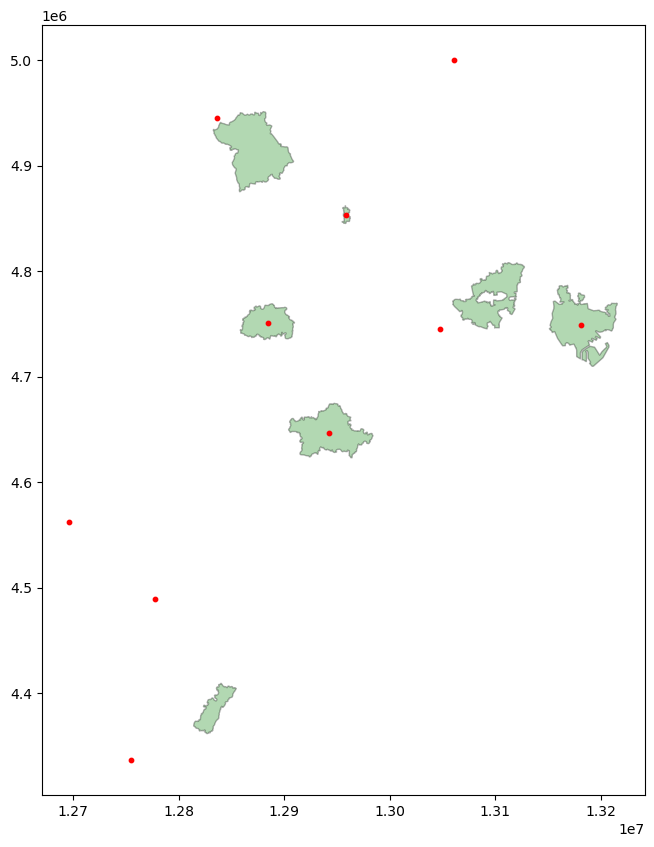

In [18]:
f,ax = plt.subplots(figsize=(8,8))

region.plot(ax=ax,edgecolor="k",facecolor='green',alpha=0.3)
points.plot(ax=ax,markersize=10,color="red")

# 1.构造型方法(Constructive Methods)

## GeoSeries.buffer(distance, resolution=16)

In [29]:
region

,index,OBJECTID,PAC,NAME,Shape_Leng,Shape_Area,geometry
0,0,1,110101,东城区,0.415102,0.004417,"POLYGON ((12958235.865 4860487.259, 12958460.9..."
1,30,31,120221,宁河区,3.474904,0.121675,"POLYGON ((13114729.580 4807125.116, 13115098.4..."
2,60,61,130209,曹妃甸区,3.724282,0.149631,"POLYGON ((13168702.388 4785782.993, 13168812.5..."
3,90,91,130433,馆陶县,1.424994,0.045856,"POLYGON ((12840633.098 4408426.181, 12840664.7..."
4,120,121,130626,定兴县,1.597963,0.074594,"POLYGON ((12890279.738 4768077.882, 12890471.3..."
5,150,151,130730,怀来县,2.415211,0.187772,"POLYGON ((12882446.397 4950182.949, 12882546.1..."
6,180,181,130984,河间市,2.573934,0.136816,"POLYGON ((12948494.205 4674449.763, 12948818.1..."


In [21]:
region.buffer(100)

0    POLYGON ((12956617.216 4850006.051, 12956574.4...
1    POLYGON ((13059672.554 4768887.817, 13059720.3...
2    POLYGON ((13158782.574 4781483.690, 13158779.2...
3    POLYGON ((12814031.662 4369144.795, 12814026.6...
4    POLYGON ((12860415.466 4748262.971, 12860414.7...
5    POLYGON ((12847926.119 4938962.626, 12847935.8...
6    POLYGON ((12905321.349 4658076.487, 12905322.4...
dtype: geometry

In [23]:
# 几何操作时默认使用活动几何列
region["geometry"].buffer(100)

0    POLYGON ((12956617.216 4850006.051, 12956574.4...
1    POLYGON ((13059672.554 4768887.817, 13059720.3...
2    POLYGON ((13158782.574 4781483.690, 13158779.2...
3    POLYGON ((12814031.662 4369144.795, 12814026.6...
4    POLYGON ((12860415.466 4748262.971, 12860414.7...
5    POLYGON ((12847926.119 4938962.626, 12847935.8...
6    POLYGON ((12905321.349 4658076.487, 12905322.4...
dtype: geometry

Text(0.5, 1.0, 'buffer')

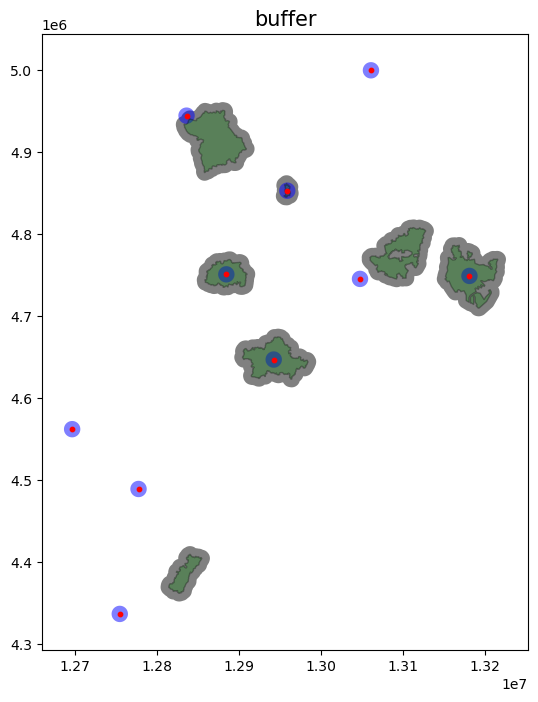

In [72]:
f,ax = plt.subplots(figsize=(8,8))

# buffer操作
region.buffer(10000).plot(ax=ax,facecolor='gray')
points.buffer(10000).plot(ax=ax,facecolor='blue',alpha=0.5)

region.plot(ax=ax,edgecolor="k",facecolor='green',alpha=0.3)
points.plot(ax=ax,markersize=10,color="red")
ax.set_title('buffer',color="k",size=15)

## GeoSeries.boundary

In [38]:
# 点的边界为空
points.boundary

0    GEOMETRYCOLLECTION EMPTY
1    GEOMETRYCOLLECTION EMPTY
2    GEOMETRYCOLLECTION EMPTY
3    GEOMETRYCOLLECTION EMPTY
4    GEOMETRYCOLLECTION EMPTY
5    GEOMETRYCOLLECTION EMPTY
6    GEOMETRYCOLLECTION EMPTY
7    GEOMETRYCOLLECTION EMPTY
8    GEOMETRYCOLLECTION EMPTY
9    GEOMETRYCOLLECTION EMPTY
dtype: geometry

In [37]:
region.boundary

0    LINESTRING (12958235.865 4860487.259, 12958460...
1    MULTILINESTRING ((13114729.580 4807125.116, 13...
2    LINESTRING (13168702.388 4785782.993, 13168812...
3    LINESTRING (12840633.098 4408426.181, 12840664...
4    LINESTRING (12890279.738 4768077.882, 12890471...
5    LINESTRING (12882446.397 4950182.949, 12882546...
6    LINESTRING (12948494.205 4674449.763, 12948818...
dtype: geometry

Text(0.5, 1.0, 'boundary')

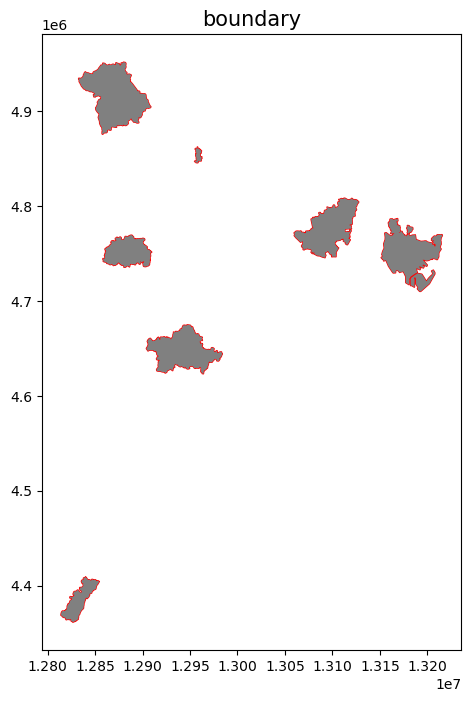

In [71]:
f,ax = plt.subplots(figsize=(8,8))

region.boundary.plot(ax=ax,facecolor='gray',edgecolor="none")

region.plot(ax=ax,edgecolor="red")
ax.set_title('boundary',color="k",size=15)

## GeoSeries.centroid

In [42]:
region.centroid

0    POINT (12958772.752 4853156.919)
1    POINT (13096848.667 4775812.827)
2    POINT (13181088.343 4749171.786)
3    POINT (12833581.077 4384984.057)
4    POINT (12884355.060 4751065.597)
5    POINT (12871049.552 4915598.812)
6    POINT (12942193.888 4647084.995)
dtype: geometry

Text(0.5, 1.0, 'centroid')

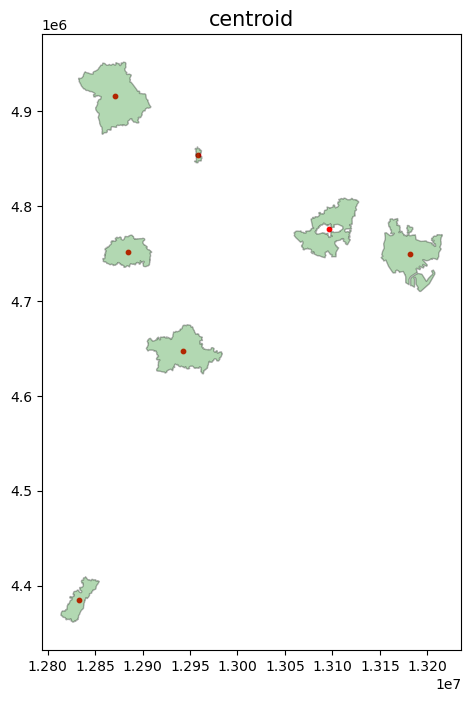

In [70]:
f,ax = plt.subplots(figsize=(8,8))

region.centroid.plot(ax=ax,markersize=10,color="red")

region.plot(ax=ax,edgecolor="k",facecolor='green',alpha=0.3)
ax.set_title('centroid',color="k",size=15)

## GeoSeries.convex_hull

## GeoSeries.envelope

In [44]:
region.convex_hull

0    POLYGON ((12957941.264 4845257.877, 12957793.6...
1    POLYGON ((13092176.246 4745317.273, 13090261.0...
2    POLYGON ((13192413.542 4709808.776, 13191681.8...
3    POLYGON ((12826903.715 4361736.144, 12826897.8...
4    POLYGON ((12881662.741 4735205.667, 12881459.5...
5    POLYGON ((12857778.535 4875286.728, 12857714.2...
6    POLYGON ((12964152.252 4623119.303, 12924431.6...
dtype: geometry

In [53]:
region.envelope

0    POLYGON ((12954801.776 4845257.877, 12962588.8...
1    POLYGON ((13059598.132 4745317.273, 13127662.7...
2    POLYGON ((13151221.576 4709808.776, 13215658.7...
3    POLYGON ((12814113.055 4361736.144, 12854330.6...
4    POLYGON ((12858320.460 4735205.667, 12909608.1...
5    POLYGON ((12832725.071 4875286.728, 12908810.1...
6    POLYGON ((12904066.513 4623119.303, 12984046.7...
dtype: geometry

Text(0.5, 1.0, 'envelope')

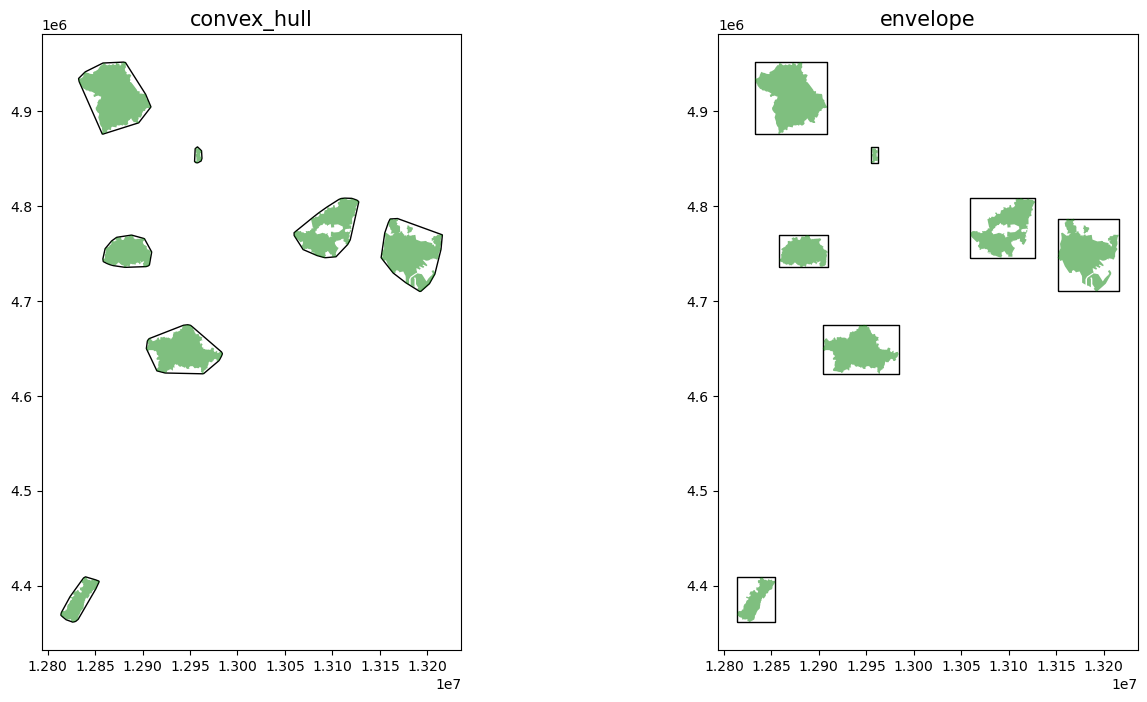

In [69]:
f,ax = plt.subplots(1,2,figsize=(16,8))

region.convex_hull.plot(ax=ax[0],edgecolor="k",facecolor='none')
region.plot(ax=ax[0],edgecolor="none",facecolor='green',alpha=0.5)
ax[0].set_title('convex_hull',color="k",size=15)

region.envelope.plot(ax=ax[1],edgecolor="k",facecolor='none')
region.plot(ax=ax[1],edgecolor="none",facecolor='green',alpha=0.5)
ax[1].set_title('envelope',color="k",size=15)

## GeoSeries.simplify(tolerance, preserve_topology=True)

In [59]:
region.simplify(tolerance=100)

0    POLYGON ((12958235.865 4860487.259, 12958460.9...
1    POLYGON ((13114729.580 4807125.116, 13115994.0...
2    POLYGON ((13168702.388 4785782.993, 13168925.9...
3    POLYGON ((12840633.098 4408426.181, 12841075.3...
4    POLYGON ((12890279.738 4768077.882, 12890661.1...
5    POLYGON ((12882446.397 4950182.949, 12882584.7...
6    POLYGON ((12948494.205 4674449.763, 12949881.3...
dtype: geometry

Text(0.5, 1.0, 'simplify')

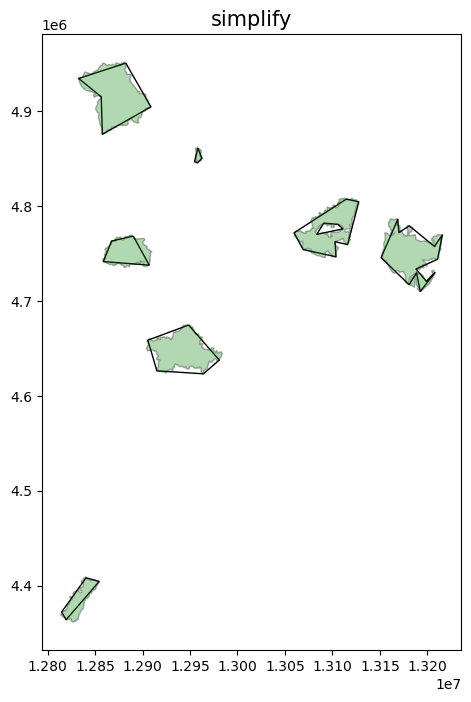

In [68]:
f,ax = plt.subplots(figsize=(8,8))

# simplify操作
region.simplify(tolerance=10000).plot(ax=ax,edgecolor="k",facecolor='none')

region.plot(ax=ax,edgecolor="k",facecolor='green',alpha=0.3)
ax.set_title('simplify',color="k",size=15)

## GeoSeries.unary_union

In [78]:
region

,index,OBJECTID,PAC,NAME,Shape_Leng,Shape_Area,geometry
0,0,1,110101,东城区,0.415102,0.004417,"POLYGON ((12958235.865 4860487.259, 12958460.9..."
1,30,31,120221,宁河区,3.474904,0.121675,"POLYGON ((13114729.580 4807125.116, 13115098.4..."
2,60,61,130209,曹妃甸区,3.724282,0.149631,"POLYGON ((13168702.388 4785782.993, 13168812.5..."
3,90,91,130433,馆陶县,1.424994,0.045856,"POLYGON ((12840633.098 4408426.181, 12840664.7..."
4,120,121,130626,定兴县,1.597963,0.074594,"POLYGON ((12890279.738 4768077.882, 12890471.3..."
5,150,151,130730,怀来县,2.415211,0.187772,"POLYGON ((12882446.397 4950182.949, 12882546.1..."
6,180,181,130984,河间市,2.573934,0.136816,"POLYGON ((12948494.205 4674449.763, 12948818.1..."


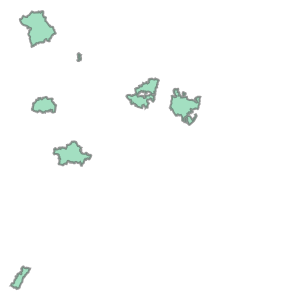

In [80]:
result = region.unary_union
result

In [81]:
# MultiPolygon
type(result)

shapely.geometry.multipolygon.MultiPolygon

In [77]:
list(result.geoms)

[<POLYGON ((12840666.552 4408347.088, 12840745.49 4408346.964, 12840799.036 4...>,
 <POLYGON ((12949171.057 4674426.942, 12949214.432 4674434.532, 12949881.354 ...>,
 <POLYGON ((13168919.47 4784678.276, 13168925.937 4784611.749, 13168922.493 4...>,
 <POLYGON ((12890661.157 4766012.696, 12891440.688 4765363.398, 12891962.731 ...>,
 <POLYGON ((13115414.35 4806674.622, 13115546.732 4806577.934, 13115622.878 4...>,
 <POLYGON ((12959684.363 4860246.527, 12960194.528 4859856.532, 12960163.332 ...>,
 <POLYGON ((12882576.37 4949113.701, 12882522.209 4948975.367, 12882489.694 4...>]

In [91]:
gpd.GeoSeries(result)

0    MULTIPOLYGON (((12840666.552 4408347.088, 1284...
dtype: geometry

In [82]:
region.area

0    7.135373e+07
1    1.950620e+09
2    2.392439e+09
3    7.079196e+08
4    1.192909e+09
5    3.052810e+09
6    2.165703e+09
dtype: float64

In [86]:
# 返回所有面的面积总和
result.area

11533754712.560368

# 2.Affine transformations

## GeoSeries.rotate(self, angle, origin=’center’, use_radians=False)

### 

## GeoSeries.scale(self, xfact=1.0, yfact=1.0, zfact=1.0, origin=’center’)

## GeoSeries.skew(self, angle, origin=’center’, use_radians=False)

## GeoSeries.translate(self, xoff=0.0, yoff=0.0, zoff=0.0)

Text(0.5, 1.0, 'translate')

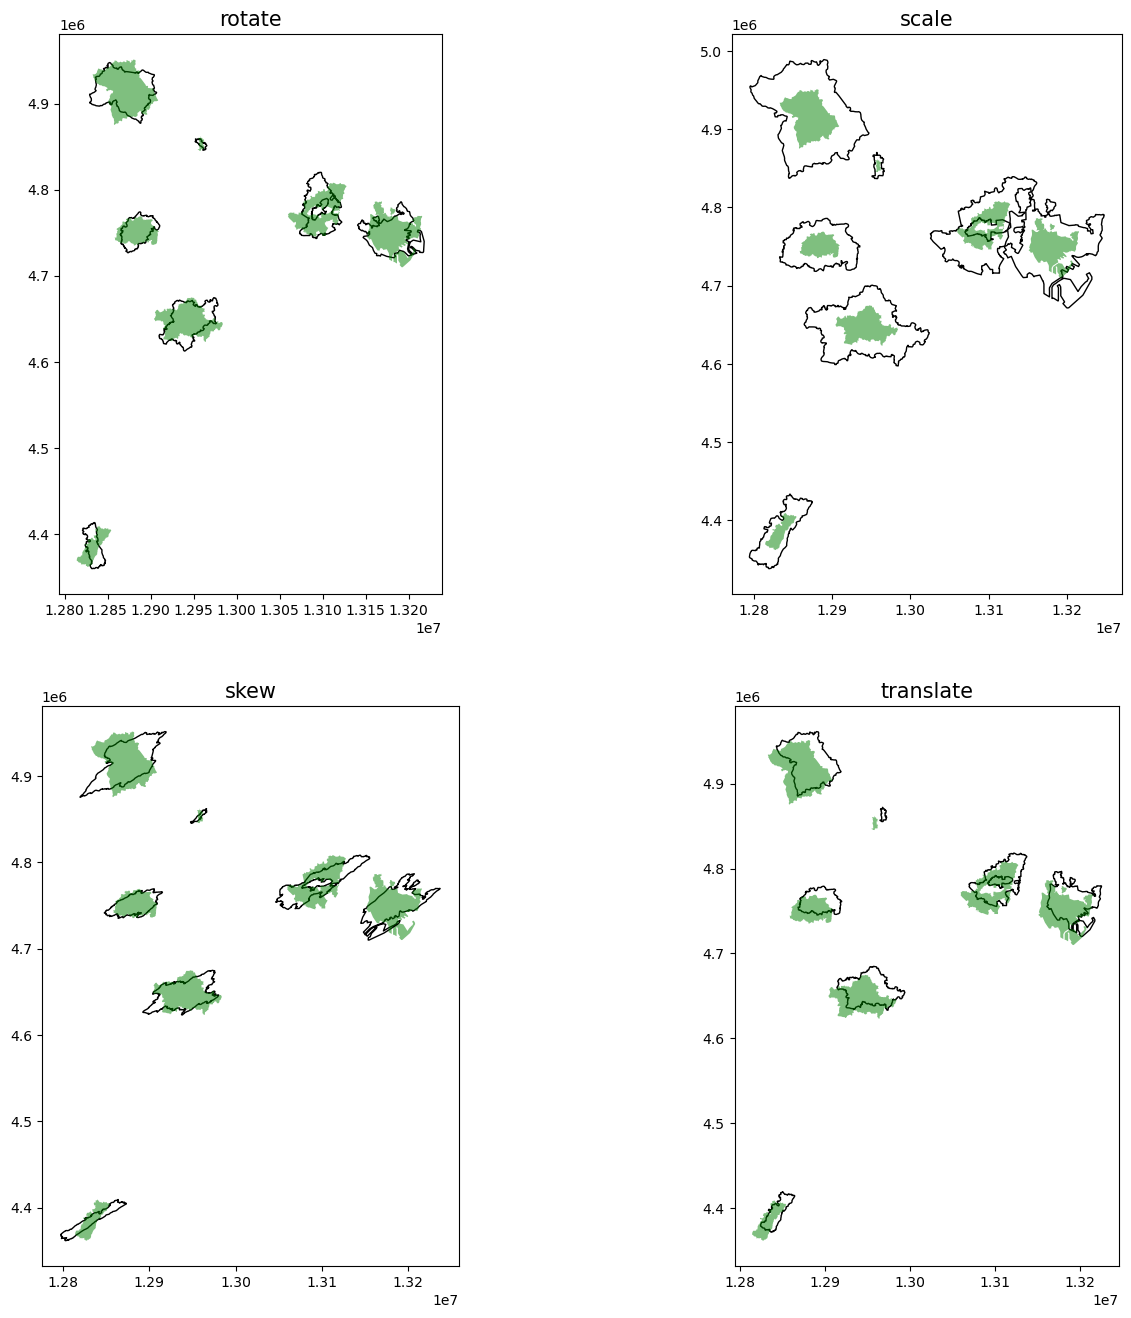

In [97]:
f,ax = plt.subplots(2,2,figsize=(16,16))

region.rotate(angle=45).plot(ax=ax[0,0],edgecolor="k",facecolor='none')
region.plot(ax=ax[0,0],edgecolor="none",facecolor='green',alpha=0.5)
ax[0,0].set_title('rotate',color="k",size=15)

region.scale(xfact=2,yfact=2).plot(ax=ax[0,1],edgecolor="k",facecolor='none')
region.plot(ax=ax[0,1],edgecolor="none",facecolor='green',alpha=0.5)
ax[0,1].set_title('scale',color="k",size=15)

region.skew(45).plot(ax=ax[1,0],edgecolor="k",facecolor='none')
region.plot(ax=ax[1,0],edgecolor="none",facecolor='green',alpha=0.5)
ax[1,0].set_title('skew',color="k",size=15)

region.translate(xoff=10000,yoff=10000).plot(ax=ax[1,1],edgecolor="k",facecolor='none')
region.plot(ax=ax[1,1],edgecolor="none",facecolor='green',alpha=0.5)
ax[1,1].set_title('translate',color="k",size=15)

## GeoSeries.affine_transform(self, matrix)

Text(0.5, 1.0, 'affine_transform')

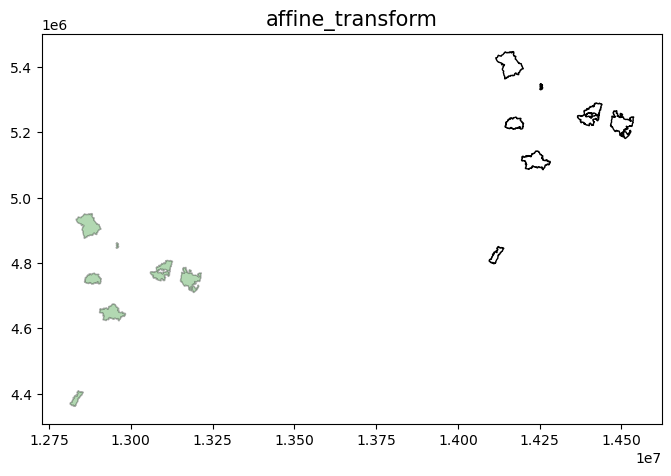

In [100]:
f,ax = plt.subplots(figsize=(8,8))

region.affine_transform([1.1,0,0,1.1,0,0]).plot(ax=ax,edgecolor="k",facecolor='none')
region.plot(ax=ax,edgecolor="k",facecolor='green',alpha=0.3)
ax.set_title('affine_transform',color="k",size=15)